# Using Reddit's API for Predicting Comments

In this project, we will practice two major skills. Collecting data via an API request and then building a binary predictor.

As we discussed in week 2, and earlier today, there are two components to starting a data science problem: the problem statement, and acquiring the data.

For this article, your problem statement will be: _What characteristics of a post on Reddit contribute most to what subreddit it belongs to?_

Your method for acquiring the data will be scraping threads from at least two subreddits. 

Once you've got the data, you will build a classification model that, using Natural Language Processing and any other relevant features, predicts which subreddit a given post belongs to.

In [1]:
### New question: how Democrat / Republican is your subreddit? (cats, dogs; narwhal, bacon)
#Sentiment analysis pre-exisitng word bag?

### Scraping Thread Info from Reddit.com

#### Set up a request (using requests) to the URL below. 

*NOTE*: Reddit will throw a [429 error](https://httpstatuses.com/429) when using the following code:
```python
res = requests.get(URL)
```

This is because Reddit has throttled python's default user agent. You'll need to set a custom `User-agent` to get your request to work.
```python
res = requests.get(URL, headers={'User-agent': 'YOUR NAME Bot 0.1'})
```

In [1]:
import pandas as pd

In [2]:
import requests
import json

#### Use `res.json()` to convert the response into a dictionary format and set this to a variable. 

```python
data = res.json()
```

In [5]:
## test
URL = "https://www.reddit.com/r/asoiaf/.json"
res = requests.get(URL, headers={'User-agent': 'Conor Barry Bot 0.1'})

In [6]:
data = res.json()

#### Getting more results

By default, Reddit will give you the top 25 posts:

```python
print(len(data['data']['children']))
```

If you want more, you'll need to do two things:
1. Get the name of the last post: `data['data']['after']`
2. Use that name to hit the following url: `http://www.reddit.com/r/boardgames.json?after=THE_AFTER_FROM_STEP_1`
3. Create a loop to repeat steps 1 and 2 until you have a sufficient number of posts. 

*NOTE*: Reddit will limit the number of requests per second you're allowed to make. When you create your loop, be sure to add the following after each iteration.

```python
time.sleep(3) # sleeps 3 seconds before continuing```

This will throttle your loop and keep you within Reddit's guidelines. You'll need to import the `time` library for this to work!

In [3]:
import time

In [7]:
#This section is all exploring the data type
data['data'].keys()

dict_keys(['modhash', 'dist', 'children', 'after', 'before'])

In [8]:
data['data']['after']

't3_9by7i3'

In [9]:
print('   ',len(data['data']['children']))

    27


In [10]:
URL = "https://www.reddit.com/r/Democrat/.json"
res = requests.get(URL, headers={'User-agent': 'Conor Barry Bot 0.1'})
data = res.json()

In [11]:
data['data']

{'modhash': '',
 'dist': 26,
 'children': [{'kind': 't3',
   'data': {'approved_at_utc': None,
    'subreddit': 'Democrat',
    'selftext': '',
    'author_fullname': 't2_92qo5q',
    'saved': False,
    'mod_reason_title': None,
    'gilded': 0,
    'clicked': False,
    'title': 'America Fights back in 2020 against Russian meddling with the VOTER RIGHTS CARD!',
    'link_flair_richtext': [],
    'subreddit_name_prefixed': 'r/Democrat',
    'hidden': False,
    'pwls': None,
    'link_flair_css_class': None,
    'downs': 0,
    'parent_whitelist_status': None,
    'hide_score': False,
    'name': 't3_7tksws',
    'quarantine': False,
    'link_flair_text_color': 'dark',
    'author_flair_background_color': '',
    'subreddit_type': 'public',
    'ups': 10,
    'domain': 'i.redd.it',
    'media_embed': {},
    'author_flair_template_id': '7d2dc812-927b-11e3-893a-12313d18400c',
    'is_original_content': False,
    'user_reports': [],
    'secure_media': None,
    'is_reddit_media_domai

In [120]:
data_list = []
URL = "https://www.reddit.com/r/Democrats/.json"
#seems to be a cap at 20
for step in range(20):
    res = requests.get(URL, headers={'User-agent': 'Conor Barry Bot 0.1'})
    data = res.json()
    
    for i in range(len(data['data']['children'])):
        temp = {}
        temp['subreddit'] = data['data']['children'][i]['data']['subreddit_name_prefixed'].replace('r/', '')
        temp['title']=data['data']['children'][i]['data']['title']
        temp['selftext'] = data['data']['children'][i]['data']['selftext']
        data_list.append(temp)

    new_after = data['data']['after']
    URL = "https://www.reddit.com/r/Democrats/.json?after=" + new_after
    print('    iteration {} worked. URL: {}'.format(step, URL))
    time.sleep(3)
    
df_democrats_scrape = pd.DataFrame(data_list)
print('    size: ', df_democrats_all.shape)
df_democrats_all.head()

    iteration 0 worked. URL: https://www.reddit.com/r/Democrats/.json?after=t3_9ch2pn
    iteration 1 worked. URL: https://www.reddit.com/r/Democrats/.json?after=t3_9cheyh
    iteration 2 worked. URL: https://www.reddit.com/r/Democrats/.json?after=t3_9c80du
    iteration 3 worked. URL: https://www.reddit.com/r/Democrats/.json?after=t3_9c72qc
    iteration 4 worked. URL: https://www.reddit.com/r/Democrats/.json?after=t3_9c0knz
    iteration 5 worked. URL: https://www.reddit.com/r/Democrats/.json?after=t3_9bu5ds
    iteration 6 worked. URL: https://www.reddit.com/r/Democrats/.json?after=t3_9bfffe
    iteration 7 worked. URL: https://www.reddit.com/r/Democrats/.json?after=t3_9b8x3p
    iteration 8 worked. URL: https://www.reddit.com/r/Democrats/.json?after=t3_9bfnzj
    iteration 9 worked. URL: https://www.reddit.com/r/Democrats/.json?after=t3_9b0s28
    iteration 10 worked. URL: https://www.reddit.com/r/Democrats/.json?after=t3_9avwpg
    iteration 11 worked. URL: https://www.reddit.com/

,selftext,subreddit,title
0,We are two of r/democrats more vocal members f...,democrats,THE TIME FOR UNITY IS NOW - A Progressive and ...
1,,democrats,Biden: ‘Everything’ at stake for Democrats in ...
2,,democrats,"Kamala Harris on Twitter: ""Remember that this ..."
3,,democrats,Bernie Sanders says Trump is a ‘pathological l...
4,,democrats,Hillary Clinton: Happy Labor Day. There's no b...


### Save your results as a CSV
You may do this regularly while scraping data as well, so that if your scraper stops of your computer crashes, you don't lose all your data.

In [121]:
# Export to csv
df_democrats_scrape.to_csv('./Data/InitialDemocratsPosts_9_03.csv', index=False)

In [10]:
df_republicans_all = pd.read_csv('./Data/InitialRepublicanPosts.csv')
df_democrats_all = pd.read_csv('./Data/InitialDemocratsPosts.csv')

In [11]:

df_init_DemRep = df_democrats_all.append(df_republicans_all, ignore_index=True, verify_integrity=True)

In [12]:
df_init_DemRep.shape

(1001, 3)

In [13]:
df_init_DemRep['subreddit'].value_counts()

democrats     501
Republican    500
Name: subreddit, dtype: int64

In [16]:
mask={
    'democrats':1, 
    'Republican':0
}
df_init_DemRep['subreddit'].map(mask)
df_init_DemRep.fillna(' ', inplace=True)
df_init_DemRep.isnull().sum()

selftext     0
subreddit    0
title        0
dtype: int64

In [17]:
#Filling this in for later application to new subs, if I get to it
#Figures as of 8/30/2018
dem_subscribers = 66.2 #Thousand
reb_subscribers = 52.4 #Thousand
dem_prior = dem_subscribers / (dem_subscribers + reb_subscribers)
dem_prior

0.5581787521079259

In [20]:
#Loosely correlates to 2016 presidential election number of 51%
#Lower Figure here jives with qualitative assumption that reddit leans democrat a little more

#### Conor's Gameplan

1. Get Dems, repubs into single frame
    1a. Convert data
    1b. Temporarily downselect titles only
2. Run logit
3. Answer basic questions
4. Create separate title vector (with word_ format for feature names) for each
5. Collect these together to one mega frame and re-rune
6. Synthesize Democrat / Republican-ness

## NLP

#### Use `CountVectorizer` or `TfidfVectorizer` from scikit-learn to create features from the thread titles and descriptions (NOTE: Not all threads have a description)
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [19]:
my_stop_words = stop_words.ENGLISH_STOP_WORDS

In [20]:
df_data = df_init_DemRep.loc[:, ['subreddit', 'title']]

In [21]:
def fit_transform_model(X=df_data.title, y=df_data.subreddit, 
                        vecmod='TFID', pred='logreg', 
                        test_size_local=None, random_state_local=42 ):
    """I absolutely created this function after running through the lab the first time. 
    I figured that it would help me clean up the rest of the document, as well as making
    additions to the model.
    With a little bit of work, this should be very generalizable to future models for me."""
    
    #get vectorizer
    if vecmod == 'TFID':
        vecmod_ = TfidfVectorizer(stop_words=my_stop_words, ngram_range=(1,3))
    else:
        vecmod_ = vecmod
    
    #TTS, 
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=test_size_local, 
                                                        random_state=random_state_local)
    X_train_transform = vecmod_.fit_transform(X_train).todense()
    X_test_transform = vecmod_.transform(X_test).todense()
    df_X_train_transform = pd.DataFrame(X_train_transform, columns=vecmod_.get_feature_names() )
    df_X_test_transform = pd.DataFrame(X_test_transform, columns=vecmod_.get_feature_names())
    
    #predict model
    if pred == 'logreg':
        funct_model_= LogisticRegression()
    else:
        funct_model_ = pred
        
    funct_model_.fit(df_X_train_transform, y_train)
    
    #Export features and scores
    global latest_model, sorted_d, train_x, test_x, test_y, train_y
    latest_model = funct_model_ 
    train_x, test_x, train_y, test_y = df_X_train_transform, df_X_test_transform, y_train, y_test

    try:
        feature_values =(dict(zip(list(df_X_train_transform.columns), list(funct_model_.coef_[0]))))
        sorted_d = sorted((value, key) for (key,value) in feature_values.items())
        
    except:
        return funct_model_.score(df_X_test_transform, y_test)
    
    return funct_model_.score(df_X_test_transform, y_test)

In [22]:
fit_transform_model()

0.6972111553784861

In [23]:
print('   republican indicators:')
for i in range(10):
    print('    ', sorted_d[i])
#print('    democratic indicators: ', sorted_d[:-10])
print('\n    democratic indicators:')
for i in range(10):
    print('    ', sorted_d[-i-1])

   republican indicators:
     (-0.5984480636388538, 'left')
     (-0.5488044144002266, 'gun')
     (-0.5262355220612943, 'liberals')
     (-0.5231938719769645, 'good')
     (-0.5134134530368043, 'socialism')
     (-0.5030253676182352, 'congressional')
     (-0.490210697278464, 'hc')
     (-0.4891010749006024, 'media')
     (-0.446918686010309, 'free')
     (-0.4345843387239702, 'life')

    democratic indicators:
     (1.866470345595284, 'trump')
     (1.217342670132449, 'president')
     (1.0114776609558307, 'mccain')
     (0.8149181734446282, 'cohen')
     (0.7846011810419642, 'twitter')
     (0.7738936478928158, 'democrats')
     (0.7323648092965098, 'plan')
     (0.7116658175775133, 'rourke')
     (0.6726589036408543, 'kavanaugh')
     (0.6533326653291052, 'beto')


#### Refit using binary features

In [30]:
fit_transform_model(vecmod=TfidfVectorizer(stop_words=my_stop_words,
                                           ngram_range = (1,1), 
                                           binary=True))

0.7051792828685259

In [31]:
print('   republican indicators:')
for i in range(10):
    print('    ', sorted_d[i])
#print('    democratic indicators: ', sorted_d[:-10])
print('\n    democratic indicators:')
for i in range(10):
    print('    ', sorted_d[-i-1])

   republican indicators:
     (-0.8543113703113804, 'left')
     (-0.8152754312971255, 'good')
     (-0.775454522607984, 'gun')
     (-0.7702200864564787, 'liberals')
     (-0.7600401777948265, 'supporters')
     (-0.7522166252206345, 'hc')
     (-0.7306916639294441, 'work')
     (-0.728088623906636, 'congressional')
     (-0.7145830163857193, 'free')
     (-0.6865350734897988, 'media')

    democratic indicators:
     (1.7823235746145472, 'trump')
     (1.7271626220987657, 'president')
     (1.2197904298138396, 'mccain')
     (1.1515761426609172, 'rourke')
     (1.0821573931416122, 'democrats')
     (1.0472360743100555, 'kavanaugh')
     (1.0147076937557096, 'twitter')
     (0.9839460599021884, 'plan')
     (0.9610823165330641, 'beto')
     (0.9509836918380705, 'cohen')


Answer: Slight improvement in model performance. Similar keywords in the top 10.

## Predicting subreddit using Random Forests + Another Classifier

#### We want to predict a binary variable - class `0` for one of your subreddits and `1` for the other.

In [32]:
## See mask step above

#### Thought experiment: What is the baseline accuracy for this model?

In [33]:
## Basline Accuracy is 50%

In [34]:
from sklearn.metrics import confusion_matrix

In [36]:
cm = confusion_matrix(test_y, latest_model.predict(test_x))
df_cm = pd.DataFrame(cm, columns=['Predicted Repub', 'Pred Dem'], index=['Actual Rep', 'Actual Dem'])
df_cm

,Predicted Repub,Pred Dem
Actual Rep,89,39
Actual Dem,35,88


In [37]:
test_y.shape[0]

251

In [38]:
#Actual Accuracy:
(df_cm.iloc[0,0] + df_cm.iloc[1,1] )/test_y.shape[0]

0.7051792828685259

In [39]:
#Given basline, model improved over random guess (50% dem) by 40%
(df_cm.iloc[0,0] + df_cm.iloc[1,1] )/test_y.shape[0] / .5

1.4103585657370519

#### Create a `RandomForestClassifier` model to predict which subreddit a given post belongs to.

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
fit_transform_model(pred=RandomForestClassifier())

0.6374501992031872

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model, as well as any other metrics you feel are appropriate. 
- **Bonus**: Use `GridSearchCV` with `Pipeline` to optimize your `CountVectorizer`/`TfidfVectorizer` and classification model.

In [43]:
cm = confusion_matrix(test_y, latest_model.predict(test_x))
df_cm = pd.DataFrame(cm, columns=['Predicted Repub', 'Pred Dem'], index=['Actual Rep', 'Actual Dem'])
df_cm
#This model prefers republicans

,Predicted Repub,Pred Dem
Actual Rep,112,16
Actual Dem,75,48


In [45]:
#Actual Accuracy:
(df_cm.iloc[0,0] + df_cm.iloc[1,1] )/test_y.shape[0]

0.6374501992031872

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
#Trying to improve on RFC here
rfc = RandomForestClassifier()
for i in range(2,10):
    print('    ', i, cross_val_score(rfc, train_x, train_y, cv=i).mean())

     2 0.5773333333333333
     3 0.5986666666666666
     4 0.6346427352372284
     5 0.622680000592619
     6 0.6373333333333334
     7 0.6173169163823369
     8 0.6358341160038049
     9 0.6212628290941544


In [48]:
fit_transform_model(test_size_local=.2)

0.7114427860696517

In [49]:
cm = confusion_matrix(test_y, latest_model.predict(test_x))
df_cm = pd.DataFrame(cm, columns=['Predicted Repub', 'Pred Dem'], index=['Actual Rep', 'Actual Dem'])
df_cm
#This model prefers dems

,Predicted Repub,Pred Dem
Actual Rep,65,39
Actual Dem,19,78


In [50]:
#Actual Accuracy:
(df_cm.iloc[0,0] + df_cm.iloc[1,1] )/test_y.shape[0]

0.7114427860696517

##### Repeat the model-building process using a different classifier (e.g. `MultinomialNB`, `LogisticRegression`, etc)

In [51]:
from sklearn.naive_bayes import MultinomialNB

In [52]:
fit_transform_model(pred=MultinomialNB())

0.6772908366533864

##### Pipeline and GridSearchCV

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from nltk.stem.snowball import EnglishStemmer

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_data.title, df_data.subreddit)
pipe = Pipeline([
    ('TfdVec2', TfidfVectorizer()),
    ('log_reg2', LogisticRegression())
])



param_grid2 = {
    'TfdVec2__stop_words':[None, my_stop_words],
    'TfdVec2__binary': [False, True],
    'log_reg2__C': [1,10,30] }

cross_val_score(pipe,X_train, y_train)

array([0.668, 0.704, 0.708])

In [56]:
pipe = Pipeline([
    ('TfdVec2', TfidfVectorizer()),
    ('log_reg2', LogisticRegression())
])



param_grid2 = {
    'TfdVec2__stop_words':[None, my_stop_words],
    'TfdVec2__binary': [False, True],
    'log_reg2__C': [1,10,30] }

gs2 = GridSearchCV(pipe, param_grid2, cv=4)
gs2.fit(X_train, y_train)
#getting weird parameters here. Suspect vectorizatoin not going great


GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('TfdVec2', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'TfdVec2__stop_words': [None, frozenset({'latter', 'etc', 'more', 'least', 'itself', 'namely', 'cannot', 'sincere', 'twenty', 'bottom', 'themselves', 'your', 'full', 'a', 'ourselves', 'find', 'whose', 'besides', 'now', 'one', 'seemed', 'thence', 'twelve', 'yours', 'they', 'at', 'would', ...'beyond', 'yourselves', 'me', 'co'})], 'TfdVec2__binary': [False, True], 'log_reg2__C': [1, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_tra

In [57]:
gs2.score(X_test, y_test)

0.7171314741035857

### Collection of Executive Summary information

In [283]:
#!pip install wordcloud

distributed 1.21.8 requires msgpack, which is not installed.
jupyterthemes 0.19.6 has requirement notebook>=5.6.0, but you'll have notebook 5.5.0 which is incompatible.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
from wordcloud import WordCloud

In [60]:
fit_transform_model(vecmod=TfidfVectorizer(stop_words=my_stop_words,
                                           ngram_range = (1,1), 
                                           binary=True))

0.7051792828685259

In [61]:
rep_word_dict = dict(sorted_d[:21])
dem_word_dict = dict(sorted(sorted_d[-20:], reverse=True))

In [62]:
dem_word_dict

{1.7823235746145472: 'trump',
 1.7271626220987657: 'president',
 1.2197904298138396: 'mccain',
 1.1515761426609172: 'rourke',
 1.0821573931416122: 'democrats',
 1.0472360743100555: 'kavanaugh',
 1.0147076937557096: 'twitter',
 0.9839460599021884: 'plan',
 0.9610823165330641: 'beto',
 0.9509836918380705: 'cohen',
 0.7889305390918601: 'mueller',
 0.7796838245266589: 'john',
 0.7756817332710645: 'administration',
 0.7641451050397615: 'presidency',
 0.6981473641623471: 'progressive',
 0.6744083577352211: 'michael',
 0.6715040869477591: 'election',
 0.6694096077103959: 'day',
 0.6648578796978475: 'corruption',
 0.6533257689917178: '2020'}

In [63]:
len(rep_word_dict)

20

In [64]:
from math import exp
import random

In [65]:
rep_word_dict_trans = {}
for key in rep_word_dict.keys():
    new_key_= int(exp(-key)*2000) #watch out for this negative
    while new_key_ in rep_word_dict.keys():
        new_key_+=1 #tie breaker prevents override of values
        print('    ',new_key_)
    rep_word_dict_trans[new_key_] = rep_word_dict[key]
rep_words_str = ''
for key in rep_word_dict_trans.keys():
    rep_words_str = rep_words_str + key*(str(rep_word_dict_trans[key]) + ' ')

In [66]:
dem_word_dict_trans = {}
for key in dem_word_dict.keys():
    new_key_= int(exp(key)*2000)
    while new_key_ in dem_word_dict.keys():
        new_key_+=1
        print('    ',new_key_)
    dem_word_dict_trans[new_key_] = dem_word_dict[key]
dem_words_str = ''
for key in dem_word_dict_trans.keys():
    dem_words_str = dem_words_str + key*(str(dem_word_dict_trans[key]) + ' ')
dem_word_dict_trans

{11887: 'trump',
 11249: 'president',
 6772: 'mccain',
 6326: 'rourke',
 5902: 'democrats',
 5699: 'kavanaugh',
 5517: 'twitter',
 5349: 'plan',
 5229: 'beto',
 5176: 'cohen',
 4402: 'mueller',
 4361: 'john',
 4344: 'administration',
 4294: 'presidency',
 4020: 'progressive',
 3925: 'michael',
 3914: 'election',
 3906: 'day',
 3888: 'corruption',
 3843: '2020'}

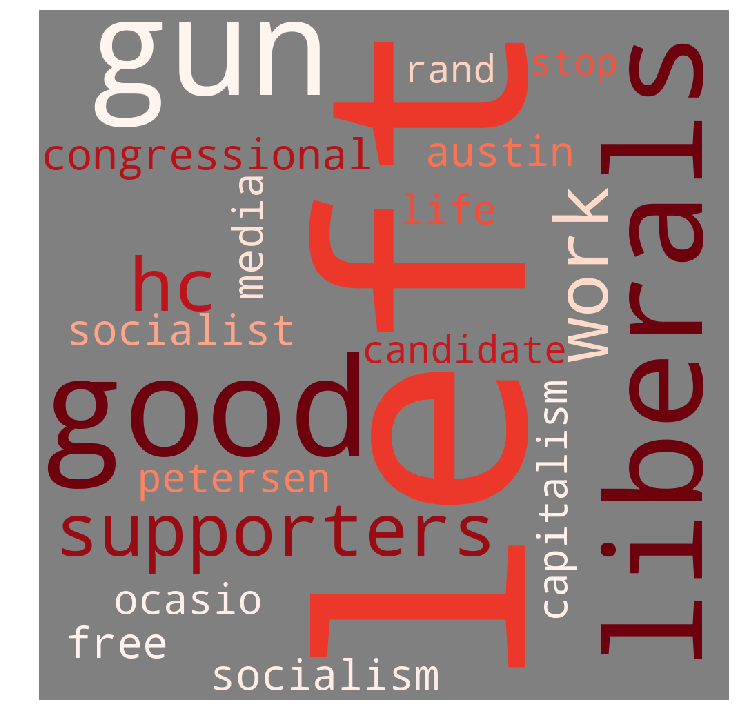

In [119]:
mycloud = WordCloud(width=1000, height=1000,
                    background_color='grey', 
                    colormap='Reds',
                    min_font_size=1,
                    max_words=len(rep_words_str),
                    collocations=False, #get rid of duplicates
                   normalize_plurals=False).generate_from_text(rep_words_str)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud)
plt.axis("off")
plt.tight_layout(pad = 0)
mycloud.to_file('./Presentation/OutputFigs/RepCloud.png')

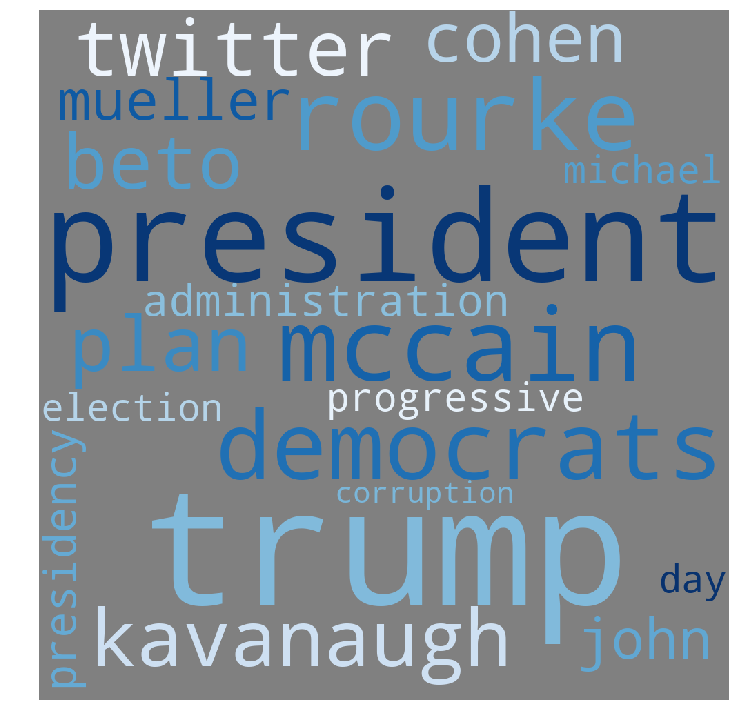

In [118]:
mycloud = WordCloud(width=1000, height=1000,
                    background_color='grey', 
                    min_font_size=1,
                    colormap='Blues',
                    collocations=False, #get rid of duplicates
                   normalize_plurals=False,
                   max_words=len(dem_words_str)).generate_from_text(dem_words_str)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud)
plt.axis("off")
plt.tight_layout(pad = 0)
mycloud.to_file('./Presentation/OutputFigs/DemCloud.png')

In [ ]:
#Talk about overlap - words more tightly clustered for republican/

In [69]:
all_rep_words = { key:dict(sorted_d)[key] for key in dict(sorted_d).keys() if key>0 }
all_dem_words = { key:dict(sorted_d)[key] for key in dict(sorted_d).keys() if key<0 }
print('   demwords:', len(all_dem_words))
print('   repwords:', len(all_rep_words))
print('   ', len(all_rep_words)+len(all_dem_words))

   demwords: 855
   repwords: 995
    1850


In [70]:
results_list = []
for i in range(50,100, 5):
    j = i/100
    temp_dict = {}
    temp_dict['strength'] = j
    temp_dict['dem_words'] = len([key for key in dict(sorted_d).keys() if key>j])
    temp_dict['rep_words'] = len([key for key in dict(sorted_d).keys() if key<-j])
    results_list.append(temp_dict)
    


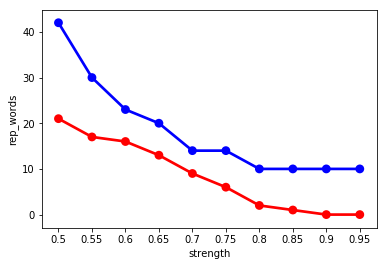

In [71]:
#Democrats talk about more things
df_stregnths = pd.DataFrame(results_list)
sns.pointplot('strength','dem_words', data=df_stregnths, color='b')
sns.pointplot('strength','rep_words', data=df_stregnths, color='r')

In [108]:
#compare predict probas
probas = latest_model.predict_proba(test_x)
dem_probs = []
rep_probs = []
for i in range(len(probas)):
    if probas[i][0] >.5:
        rep_probs.append(1-probas[i][0])
    else:
        dem_probs.append(probas[i][1])

In [109]:
print('    average dem score: ', sum(dem_probs) / len(dem_probs))
print('    average rep score: ', sum(rep_probs) / len(rep_probs))

    average dem score:  0.5861526904671871
    average rep score:  0.4266024151657437


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


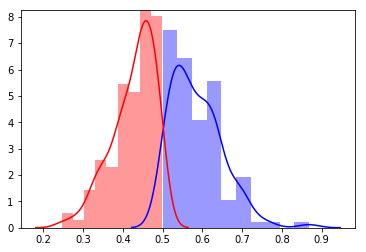

In [110]:
#Distribution of republican and Democrat strength scoring
sns.distplot(dem_probs, label='dem', color='blue') 
sns.distplot(rep_probs, label='rep', color='red')

In [ ]:
'''For the purposes of applying this to a random subreddit, 
we want scores outside [.43 to .58]'''

In [ ]:
#Which posts were the most?

In [81]:
df_checker = pd.DataFrame(pd.Series(test_y))

In [82]:
df_checker['rep_score'] = [probas[i][0] for i in range(len(probas))]
df_checker['dem_score'] = [probas[i][1] for i in range(len(probas))]

In [83]:
#Most republican post
df_checker[df_checker['rep_score']==df_checker['rep_score'].max()]

,subreddit,rep_score,dem_score
987,Republican,0.753994,0.246006


In [85]:
#Most democratic post
df_checker[df_checker['dem_score']==df_checker['dem_score'].max()]

,subreddit,rep_score,dem_score
96,democrats,0.131974,0.868026


In [106]:
#The most democratic thing you could suggest right now:
#df_init_DemRep.iloc[96:97, :] no selftext...
df_init_DemRep['title'][96]

'Will Beto O’Rourke Become President?'

In [105]:
#The most Republican thing you could suggest right now:
#df_init_DemRep.iloc[987:988, :]no selftext...
df_init_DemRep['title'][987]

"Alexandria Ocasio-Cortez Says Unemployment Is Low 'Because Everyone Has Two Jobs,' Which Is Not How Unemployment Rates Work"

In [97]:
df_init_DemRep.columns

Index(['selftext', 'subreddit', 'title'], dtype='object')

In [ ]:
###

# Executive Summary
---
Put your executive summary in a Markdown cell below.

In [ ]:
df_data.su

### The Need

YOU are a totally legitimate campaign strategy group (and not at all a nefarious foreign entity).     

YOU **NEED** to expand your voter turnout numbers by identifying low-key voters who would support you, but eschew venues by which you would normally reach out to them (e.g. Facebook).   
  
YOU are smart and cautious, having seen how a misplaced ad or statement can be easily twisted to support the other side, and want to make sure your ads are interpreted as intended.
  
 So where are these voters?? How do you mine them and find them without stepping on mines?
 
 ### The solution
 Introducing **The HUAC 9000**   
 
 Named for the infamous and (occaisionally) successful communist hunting committee of the 1950s, the HUAC 9000 uses data from thousands of known Democratic and Republican posts to ferret out party-line sentiment hidden under benign cat-posts.   
   
The HUAC 9000 can identify party leanings and the strength of those leanings in an easy to interpret score, saving you time and precious resources by increasing the effectiveness of ads. 
  
  
### We can do it
Our team has years of cumulative experience getting blind-sided by uncomfortable political conversations that seem to erupt out of nowhere. Exasperated that it was becoming impossible to talk about anything nice for more than 5 minutes, our team (consisting of top 50 Kaggle scoreres in the Ames Iowa competition and codewars veterans rank 5 or higher) spent uncountable hours fine-tuning the HUAC. 
  
  
### Now is the Time
Our team of trained experts will stand up a HUAC 9000 implementation tuned to your candidate, and teach you to search Reddit to find your supporters. No one is looking over your shoulder ;), meaning you have more time to focus on what matters.  
  
  
If they can vote for Laurel or Yonny, they can vote for your candidate. Don't let them get away - buy HUAC 9000 Today.

# Outside Testing
---
Put your executive summary in a Markdown cell below.